In [2]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [4]:
# Loading the dataset
df = pd.read_csv("../data/online_gaming_behavior_dataset.csv")

# Created churn column
df["Churn"] = df["EngagementLevel"].apply(lambda x: 1 if x == "Low" else 0)

# Keeping numeric features 
X = df.select_dtypes(include=["int64", "float64"]).drop("Churn", axis=1)
y = df["Churn"]

In [5]:
# training the model
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [6]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    })

comparison_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False)
comparison_df

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Model,Accuracy,Precision,Recall,F1 Score
2,Random Forest,0.945298,0.914787,0.871954,0.892857
1,Decision Tree,0.891845,0.785216,0.806976,0.795947
0,Logistic Regression,0.877732,0.810826,0.694219,0.748005


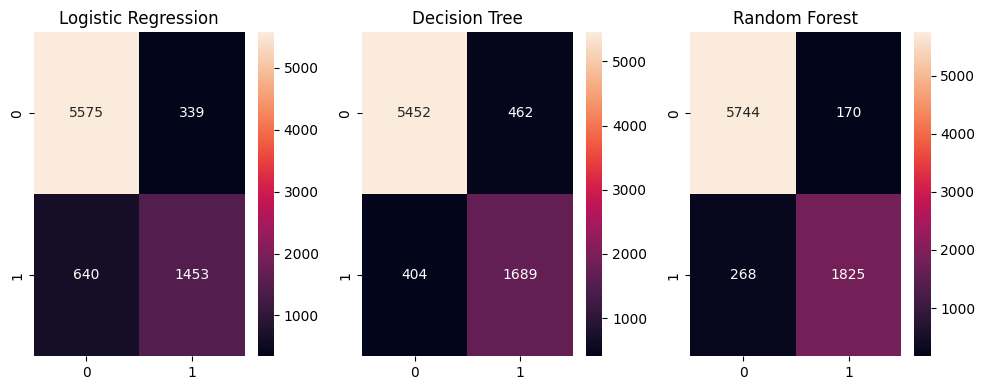

In [7]:
# confusion matrix visualization for different models
plt.figure(figsize=(10,4))

for i, (name, model) in enumerate(models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.subplot(1,3,i+1)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title(name)

plt.tight_layout()
plt.show()

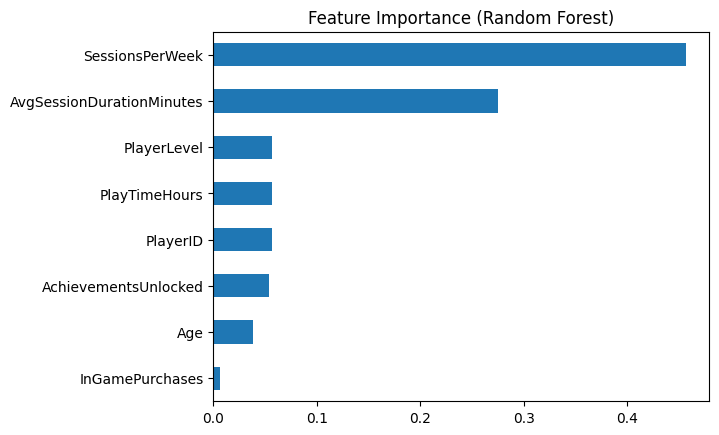

In [8]:
# plot for important features in Random Forest
rf = models["Random Forest"]

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values().plot(kind="barh")
plt.title("Feature Importance (Random Forest)")
plt.show()

In [9]:
# best model for comparison baesd on F1 Score
best_model_name = comparison_df.iloc[0]["Model"]
best_model = models[best_model_name]

print("Best Model:", best_model_name)

Best Model: Random Forest
